In [4]:
from numpy import array, eye, ones, vstack, zeros
from pypoman import plot_polygon, project_polytope
from pacti.terms.polyhedra import PolyhedralContract


# From digital_signal_processing/dsp_wl.ipynb
# contract_sys = contract1.compose(contract2)
# print("Contract Sys:\n" + str(contract_sys))
# Contract Sys:
# InVars: [<Var p1_a>, <Var p1_e>, <Var p2_a>, <Var p2_e>, <Var p4_a>, <Var p4_e>]
# OutVars:[<Var p5_a>, <Var p5_e>]
# A: 1*p4_a <= 0.250000000000000, 1*p1_a + 1*p2_a <= 8.0
# G: -1*p1_e + -1*p2_e + -1*p4_e + 1*p5_e <= 0.187500000000000, -1*p4_a + 1*p5_a <= 7.75, -1*p1_a + -1*p2_a + -1*p4_a + 1*p5_a <= 0.0, 1*p5_a <= 7.875
contract_sys = PolyhedralContract.from_dict({
    "InputVars": ["p1_a", "p1_e", "p2_a", "p2_e", "p4_a", "p4_e"],
    "OutputVars": ["p5_a", "p5_e"],
    "assumptions": [
      {"coefficients":{"p4_a":1}, "constant":0.25},
      {"coefficients":{"p1_a":1, "p2_a":1}, "constant":8.0}],
    "guarantees": [
      {"coefficients":{"p1_e":-1, "p2_e":-1, "p4_e":-1, "p5_e":1}, "constant":0.1875},
      {"coefficients":{"p4_a":-1, "p5_a":1}, "constant":7.75},
      {"coefficients":{"p1_a":-1, "p2_a":-1, "p4_a":-1, "p5_a":1}, "constant":0.0},
      {"coefficients":{"p5_a":1}, "constant":7.875}
    ]
})
print("Contract Sys:\n" + str(contract_sys))


Contract Sys:
InVars: [<Var p1_a>, <Var p1_e>, <Var p2_a>, <Var p2_e>, <Var p4_a>, <Var p4_e>]
OutVars:[<Var p5_a>, <Var p5_e>]
A: 1*p4_a <= 0.25, 1*p1_a + 1*p2_a <= 8.0
G: -1*p1_e + -1*p2_e + -1*p4_e + 1*p5_e <= 0.1875, -1*p4_a + 1*p5_a <= 7.75, -1*p1_a + -1*p2_a + -1*p4_a + 1*p5_a <= 0.0, 1*p5_a <= 7.875


Q: How do we derive the pypoman inputs for such a contract?

1) do we plot assumptions only or assumptions & constraints?

suppose its both.

2) the `x` vector corresponds to the input variables or the union of input and output variables.

`x = [p1_a, p1_e, p2_a, p2_e, p4_a, p4_e, p5_a, p5_e]`

3) Choose `y` as a component of this `x` vector.

`y=p5_a`

4) apply rewrites for constraints coresponding to equalities

None; i.e., no inputs `C,d` for pypoman

5) for pypoman, the inputs `A,b` correspond to the matrix of coefficients and the vector of constants respectively.

6) Choose `E,f`

TODO...



In [ ]:

n = 10  # dimension of the original polytope
p = 2   # dimension of the projected polytope

# Original polytope:
# - inequality constraints: \forall i, |x_i| <= 1
# - equality constraint: sum_i x_i = 0
A = vstack([+eye(n), -eye(n)])
b = ones(2 * n)
C = ones(n).reshape((1, n))
d = array([0])
ineq = (A, b)  # A * x <= b
eq = (C, d)    # C * x == d

# Projection is proj(x) = [x_0 x_1]
E = zeros((p, n))
E[0, 0] = 1.
E[1, 1] = 1.
f = zeros(p)
proj = (E, f)  # proj(x) = E * x + f

vertices = project_polytope(proj, ineq, eq, method='bretl')

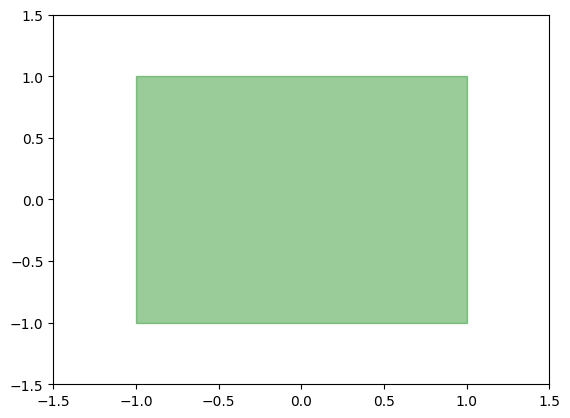

In [2]:
import pylab
pylab.ion()
pylab.figure()
plot_polygon(vertices)